In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\bharath simha reddy\Downloads\archive\Sample - Superstore.csv",encoding='latin1')
print("Shape:",df.shape)
print("\nColumns:",df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Shape: (9994, 21)

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


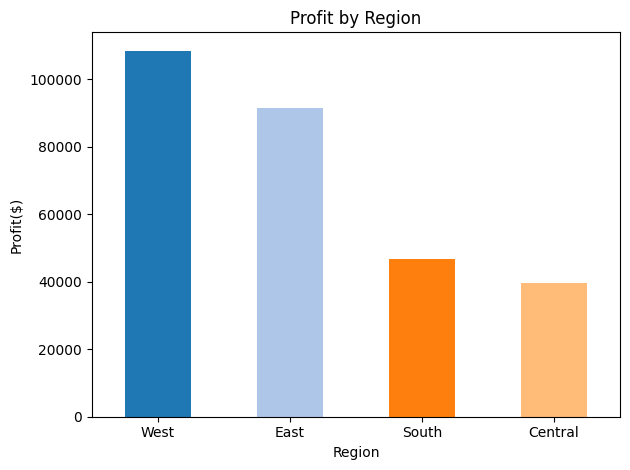

In [28]:
#Profit by Region
Region_Profit=df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print(Region_Profit)
num=len('Region')
colors=plt.cm.tab20(range(num))
Region_Profit.plot(kind='bar', color=colors)
plt.title('Profit by Region')
plt.ylabel('Profit($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Customer Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Roy Skaria            22.328
Mitch Gastineau       16.739
Carl Jackson          16.520
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64


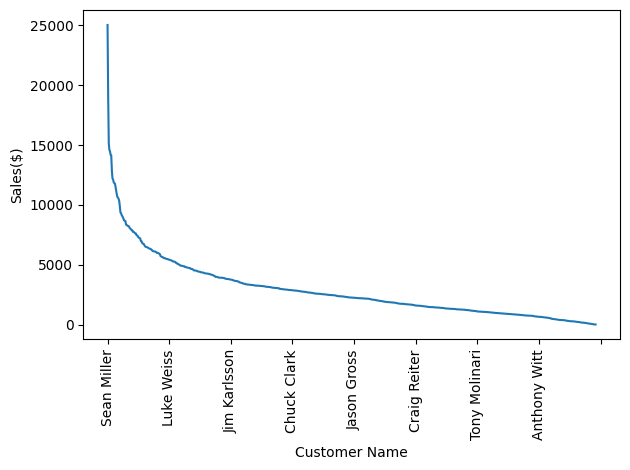

In [23]:
#Sales By Customers
customer_sales=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
print(customer_sales)
num=len('Customer Name')
colors=plt.cm.tab20(range(num))
customer_sales.plot(kind='line',color=colors)
plt.ylabel('Sales($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


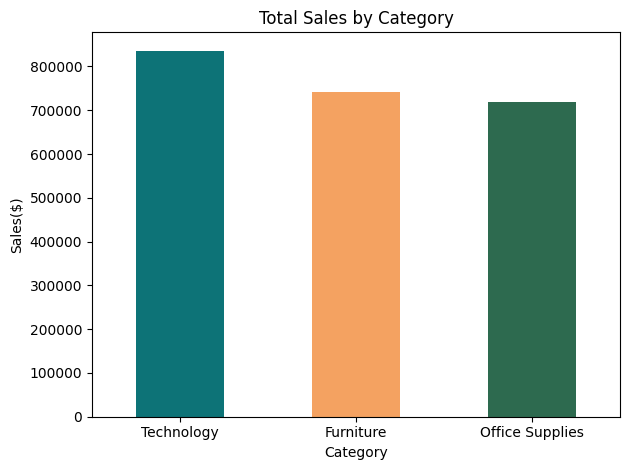

In [26]:
#sales by category
cat_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(cat_sales)

cat_sales.plot(kind='bar', color=['#0D7377', '#F4A261', '#2D6A4F'])
plt.title('Total Sales by Category')
plt.ylabel('Sales($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


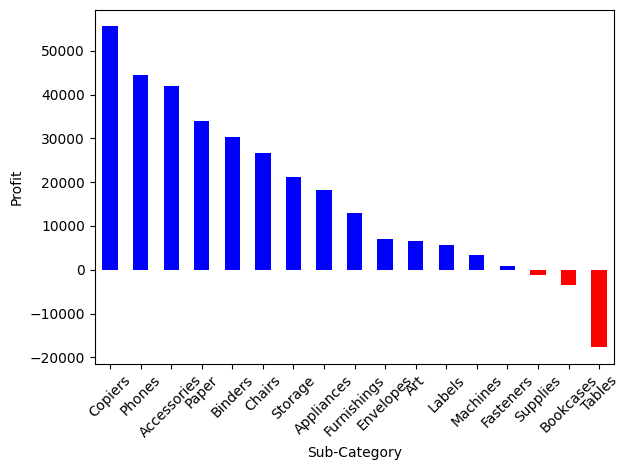

In [39]:
# Profit by Sub-Category
sub_prof = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print(sub_prof)

sub_prof.plot(
    kind='bar',
    color=['red' if x < 0 else 'blue' for x in sub_prof] )

plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

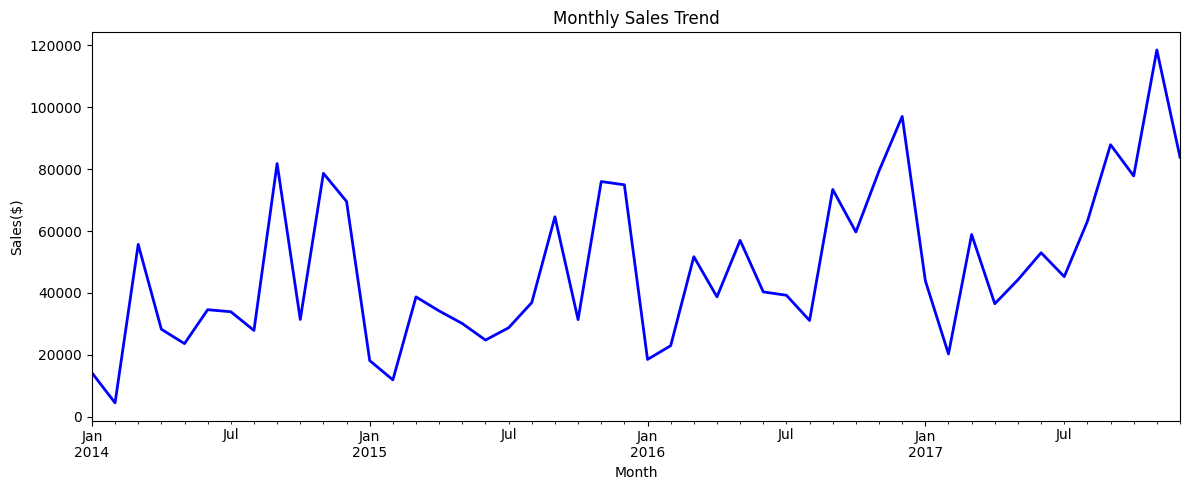

In [44]:
#Sales trend over time
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month']=df['Order Date'].dt.to_period('M')
monthly_sales=df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line',figsize=(12,5),color="blue",linewidth=2)
plt.title("Monthly Sales Trend")
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

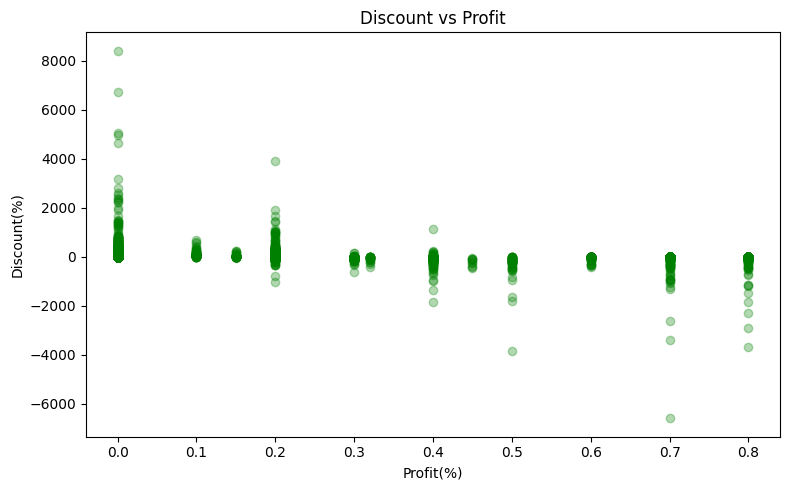

In [48]:
#discount vs profit
plt.figure(figsize=(8,5))
plt.scatter(df['Discount'],df['Profit'],alpha=0.3,color="green")
plt.title("Discount vs Profit")
plt.ylabel('Discount(%)')
plt.xlabel('Profit(%)')
plt.tight_layout()
plt.show()

Top 10 Customers by Profit:
Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64


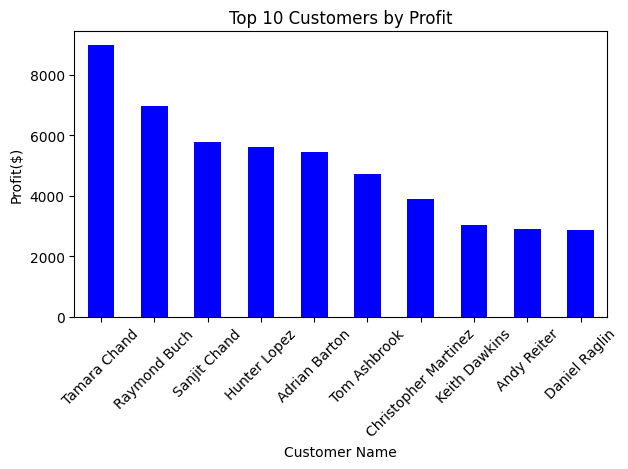

In [54]:
cst_profit=df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Profit:")
print(cst_profit)
cst_profit.plot(kind='bar',color='blue')
plt.title("Top 10 Customers by Profit")
plt.ylabel("Profit($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()